In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()

# Create a Train Test Split

Use `koi_disposition` for the y values

In [3]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
target = df['koi_disposition'].values.reshape(-1, 1)
target_names = ['FALSE POSITIVE','CONFIRMED','CANDIDATE']

data = df.drop('koi_disposition', axis=1)
feature_names = data.columns
data.head()
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

# Pre-processing

Scale the data using the MinMaxScaler

In [4]:
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

C:\Users\bethf\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Train the Support Vector Machine

In [5]:
from sklearn.svm import SVC 

In [6]:
model = SVC(kernel='linear')
model.fit(X_train_scaled, np.ravel(y_train,order='C'))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8502592253735896
Testing Data Score: 0.838975297346752


In [8]:
from sklearn.metrics import classification_report,confusion_matrix

# Predicted outcomes
predictions = model.predict(X_test_scaled)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.73      0.56      0.63       523
     CONFIRMED       0.68      0.80      0.73       594
FALSE POSITIVE       0.98      1.00      0.99      1069

     micro avg       0.84      0.84      0.84      2186
     macro avg       0.80      0.78      0.79      2186
  weighted avg       0.84      0.84      0.83      2186

[[ 291  222   10]
 [ 106  474   14]
 [   0    0 1069]]


# Hyperparameter Tuning

Use `GridSearchCV` to tune the `C` and `gamma` parameters

In [10]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,10,100,1000,10000],
              'gamma': [1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [11]:
# Train the model with GridSearch
grid.fit(X_train_scaled, np.ravel(y_train,order='C'))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] C=0.1, gamma=1 ..................................................


C:\Users\bethf\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.1, gamma=1, score=0.8217550274223034, total=   0.8s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, score=0.8233409610983982, total=   0.7s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, score=0.8279176201372997, total=   0.8s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8217550274223034, total=   0.7s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8233409610983982, total=   0.7s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8279176201372997, total=   0.8s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.8217550274223034, total=   0.7s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.8233409610983982, total=   0.7s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.8279176201372997, total=   0.7s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ........ C=1000, gamma=1, score=0.8957952468007313, total=   5.2s
[CV] C=1000, gamma=1 .................................................
[CV] ........ C=1000, gamma=1, score=0.8750572082379863, total=   4.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........ C=1000, gamma=1, score=0.8974828375286041, total=   4.6s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.8957952468007313, total=   5.2s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.8750572082379863, total=   3.7s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.8974828375286041, total=   4.5s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..... C=1000, gamma=0.01, score=0.8957952468007313, total=   4.8s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  7.2min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000, 10000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [12]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1000, 'gamma': 1}
0.8894480024397682


In [13]:
model2 = SVC(kernel='linear',C=1000,gamma=1)
model2.fit(X_train_scaled, np.ravel(y_train,order='C'))

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Training Data Score: 0.8937175968283013
Testing Data Score: 0.8879231473010064


In [39]:
# Predicted outcomes
predictions2 = model2.predict(X_test_scaled)

print(classification_report(y_test,predictions2))
print(confusion_matrix(y_test,predictions2))

                precision    recall  f1-score   support

     CANDIDATE       0.84      0.69      0.76       523
     CONFIRMED       0.77      0.86      0.81       594
FALSE POSITIVE       0.98      1.00      0.99      1069

     micro avg       0.89      0.89      0.89      2186
     macro avg       0.86      0.85      0.85      2186
  weighted avg       0.89      0.89      0.89      2186

[[ 362  151   10]
 [  70  510   14]
 [   0    0 1069]]


# Naive Bayes 

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
model3 = GaussianNB()
model3.fit(X_train_scaled, np.ravel(y_train))

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
print(f"Training Data Score: {model3.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model3.score(X_test_scaled, y_test)}")

Training Data Score: 0.7580054894784996
Testing Data Score: 0.757548032936871


In [38]:
predictions3 = model3.predict(X_test_scaled)

print(classification_report(y_test,predictions3))
print(confusion_matrix(y_test,predictions3))

                precision    recall  f1-score   support

     CANDIDATE       0.55      0.37      0.45       523
     CONFIRMED       0.60      0.91      0.72       594
FALSE POSITIVE       0.99      0.86      0.92      1069

     micro avg       0.76      0.76      0.76      2186
     macro avg       0.71      0.71      0.70      2186
  weighted avg       0.78      0.76      0.75      2186

[[195 319   9]
 [ 48 541   5]
 [109  40 920]]


# Random Forests

In [22]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=500)
model4.fit(X_train_scaled, np.ravel(y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
print(f"Training Data Score: {model4.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model4.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8970722781335773


In [37]:
# Predicted outcomes
predictions4 = model4.predict(X_test_scaled)

print(classification_report(y_test,predictions4))
print(confusion_matrix(y_test,predictions4))

                precision    recall  f1-score   support

     CANDIDATE       0.85      0.73      0.78       523
     CONFIRMED       0.81      0.86      0.83       594
FALSE POSITIVE       0.97      1.00      0.98      1069

     micro avg       0.90      0.90      0.90      2186
     macro avg       0.87      0.86      0.87      2186
  weighted avg       0.90      0.90      0.90      2186

[[ 382  121   20]
 [  70  511   13]
 [   0    1 1068]]


# Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
model5.fit(X_train_scaled, np.ravel(y_train))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [27]:
print(f"Training Data Score: {model5.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model5.score(X_test_scaled, y_test)}")

Training Data Score: 0.9257395547422995
Testing Data Score: 0.9039341262580055


In [36]:
# Predicted outcomes
predictions5 = model5.predict(X_test_scaled)

print(classification_report(y_test,predictions5))
print(confusion_matrix(y_test,predictions5))

                precision    recall  f1-score   support

     CANDIDATE       0.85      0.77      0.81       523
     CONFIRMED       0.82      0.86      0.84       594
FALSE POSITIVE       0.98      1.00      0.99      1069

     micro avg       0.90      0.90      0.90      2186
     macro avg       0.88      0.87      0.88      2186
  weighted avg       0.90      0.90      0.90      2186

[[ 401  112   10]
 [  72  508   14]
 [   0    2 1067]]


# K Neighbors

k: 1, Train/Test Score: 1.000/0.783
k: 3, Train/Test Score: 0.895/0.799
k: 5, Train/Test Score: 0.869/0.812
k: 7, Train/Test Score: 0.862/0.812
k: 9, Train/Test Score: 0.857/0.810
k: 11, Train/Test Score: 0.851/0.805
k: 13, Train/Test Score: 0.848/0.802
k: 15, Train/Test Score: 0.847/0.809
k: 17, Train/Test Score: 0.843/0.806
k: 19, Train/Test Score: 0.840/0.808


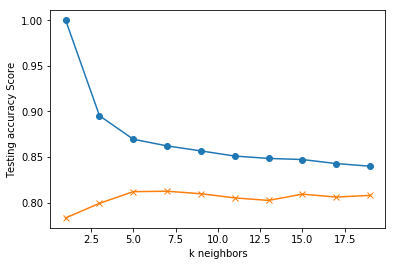

In [30]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, np.ravel(y_train))
    train_score = knn.score(X_train_scaled, np.ravel(y_train))
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [31]:
model6 = KNeighborsClassifier(n_neighbors=5)
model6.fit(X_train_scaled, np.ravel(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [32]:
print(f"Training Data Score: {model6.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model6.score(X_test_scaled, y_test)}")

Training Data Score: 0.8694724001219885
Testing Data Score: 0.8119853613906679


In [35]:
# Predicted outcomes
predictions6 = model6.predict(X_test_scaled)

print(classification_report(y_test,predictions6))
print(confusion_matrix(y_test,predictions6))

                precision    recall  f1-score   support

     CANDIDATE       0.65      0.52      0.58       523
     CONFIRMED       0.64      0.73      0.69       594
FALSE POSITIVE       0.98      1.00      0.99      1069

     micro avg       0.81      0.81      0.81      2186
     macro avg       0.76      0.75      0.75      2186
  weighted avg       0.81      0.81      0.81      2186

[[ 271  241   11]
 [ 145  435   14]
 [   0    0 1069]]
